In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [43]:
data = pd.read_excel('All Star 2021.xlsx')  
data.drop('Player', axis=1)

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS▼,All Star
0,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,5.3,...,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,1
1,SG,27,WAS,60,60,35.8,11.2,23.0,0.485,2.2,...,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,1
2,PG,30,POR,67,67,35.8,9.0,19.9,0.451,4.1,...,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8,1
3,C,26,PHI,51,51,31.1,9.0,17.6,0.513,1.1,...,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,1
4,PF,26,MIL,61,61,33.0,10.3,18.0,0.569,1.1,...,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,PG,20,GSW,12,0,5.2,0.6,1.7,0.350,0.3,...,0.3,0.8,1.0,0.5,0.1,0.1,1.3,0.8,1.9,0
1496,PF,21,POR,16,0,5.8,0.7,1.8,0.393,0.1,...,0.1,1.1,1.2,0.2,0.3,0.3,0.4,0.8,1.8,0
1497,PG,23,HOU,5,0,5.6,0.4,1.8,0.222,0.4,...,0.0,0.0,0.0,0.6,0.0,0.0,0.2,0.2,1.8,0
1498,PF,26,SAS,4,0,7.5,0.8,1.5,0.500,0.0,...,0.5,2.0,2.5,0.3,0.3,0.0,1.0,0.8,1.8,0


In [44]:
data.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS▼,All Star
0,Stephen Curry,PG,32,GSW,63,63,34.2,10.4,21.7,0.482,...,0.5,5.0,5.5,5.8,1.2,0.1,3.4,1.9,32.0,1
1,Bradley Beal,SG,27,WAS,60,60,35.8,11.2,23.0,0.485,...,1.2,3.5,4.7,4.4,1.2,0.4,3.1,2.3,31.3,1
2,Damian Lillard,PG,30,POR,67,67,35.8,9.0,19.9,0.451,...,0.5,3.7,4.2,7.5,0.9,0.3,3.0,1.5,28.8,1
3,Joel Embiid,C,26,PHI,51,51,31.1,9.0,17.6,0.513,...,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,1
4,Giannis Antetokounmpo,PF,26,MIL,61,61,33.0,10.3,18.0,0.569,...,1.6,9.4,11.0,5.9,1.2,1.2,3.4,2.8,28.1,1


In [86]:
columns_to_convert = ['Pos']

# Define a mapping dictionary for non-numeric values
mapping = {'PG': 1, 'SG-PG': 2, 'PG-SG': 3, 'SG': 4, 'SG-SF': 5, 'SF-SG': 6, 'SF': 7, 'SF-PF': 8, 'PF-SF': 9, 'PF': 10, 'C-PF': 11, 'C': 12, 'SG-PG-SF':13, 'PF-C': 14}

# Convert the selected columns to numeric using the mapping dictionary
data[columns_to_convert] = data[columns_to_convert].replace(mapping)

# Replace missing values (NaN) with 0
data.fillna(0, inplace=True)
X = data.drop(['All Star', 'Player','Tm'], axis=1)  
y = data['All Star']



In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [113]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

try:
    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create an SGD Classifier model
    sgd_model = SGDClassifier(loss='log', random_state=42)

    # Train the model
    sgd_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    sgd_y_pred = sgd_model.predict(X_test_scaled)

except Exception as e:
    print("An error occurred:", str(e))

    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy
accuracy = accuracy_score(y_test, sgd_y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, sgd_y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, sgd_y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, sgd_y_pred)
print("F1-score:", f1)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, sgd_y_pred)
print("ROC-AUC score:", roc_auc)


Accuracy: 0.98
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1-score: 0.8333333333333334
ROC-AUC score: 0.9113475177304966


Accuracy: 0.98
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1-score: 0.8333333333333334
ROC-AUC score: 0.9113475177304966


In [91]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred_log)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_log)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_log)
print("F1-score:", f1)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_log)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.9733333333333334
Precision: 0.8571428571428571
Recall: 0.6666666666666666
F1-score: 0.75
ROC-AUC score: 0.8297872340425532


/Users/dm/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, rf_y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, rf_y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, rf_y_pred)
print("F1-score:", f1)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, rf_y_pred)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.9666666666666667
Precision: 0.8333333333333334
Recall: 0.5555555555555556
F1-score: 0.6666666666666667
ROC-AUC score: 0.7742316784869976


In [110]:
###After inital testing, SGD Model seems to be the best performing based on default parameters. 
##This will be the choosen model to further tune

from sklearn.model_selection import GridSearchCV

#a dictionary of various hyperparameters to test
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'l1_ratio': [0.1, 0.3, 0.5],
    'max_iter': [1000, 2000, 5000]
}

#setup cross validation using gridsearch 
grid_search = GridSearchCV(sgd_model, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_scaled, y_train)


#setup and analyze best results
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model:", best_model)
print("Best parameters:", best_params)
print("Best Recall: ", best_score)

best_y_pred = best_model.predict(X_test_scaled)

Best model: SGDClassifier(alpha=0.001, l1_ratio=0.1, random_state=42)
Best parameters: {'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 1000}
Best Recall:  0.7346153846153847


###Base Model seems to perform best on this dataset###

In [106]:
#Use Kernel Approximation for further improvement

from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

#intialize transformer
rks_transformer = RBFSampler(gamma=0.1, random_state=42)

#create a pipeline using rks and sgd
pipeline = make_pipeline(rks_transformer, SGDClassifier(loss='log', random_state=42))
pipeline.fit(X_train, y_train)
rks_y_pred = pipeline.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, rks_y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, rks_y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, rks_y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, rks_y_pred)
print("F1-score:", f1)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, rks_y_pred)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.94
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC score: 0.5


/Users/dm/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Data set too small for Kernel aproximation.##

##After further experiment, the SGD model using 'hinge' loss function seems to perform the best##

In [114]:
###Modularize Data into a Pipeline##

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

# Create the pipeline
pipeline = make_pipeline(
    StandardScaler(),  # Feature scaling
    SGDClassifier(loss='hinge', random_state=42)  # SGD Classifier
)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score:", roc_auc)


Accuracy: 0.98
Precision: 0.8333333333333334
Recall: 0.8333333333333334
F1-score: 0.8333333333333334
ROC-AUC score: 0.9113475177304966


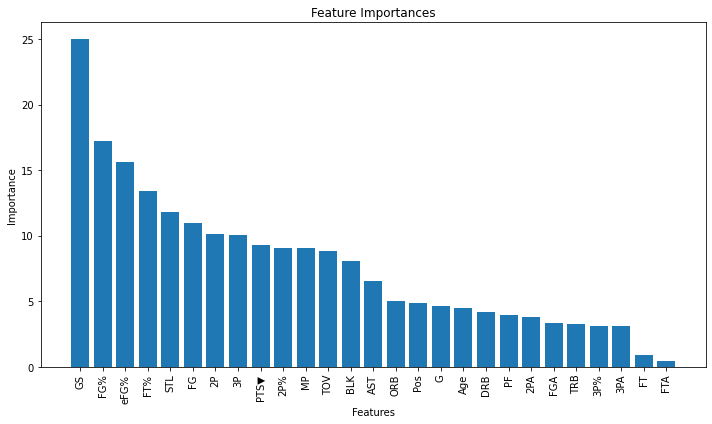

In [126]:
###View feature importance##

import numpy as np

# Get the feature importances
feature_importances = np.abs(sgd_model.coef_[0])

# Get the feature names
feature_names = X.columns

# Sort the features based on their importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
##It is determined that Games Started and Field goal percentages tend to indicate the overall success of the players season (offensively)

/Users/dm/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


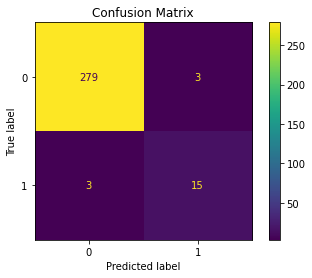

/Users/dm/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


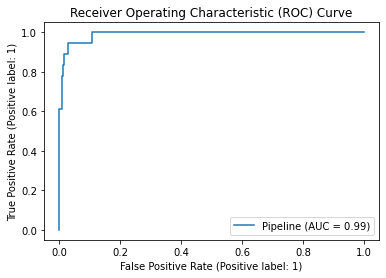

/Users/dm/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


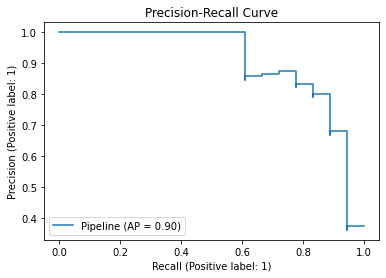

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       282
           1       0.71      0.56      0.63        18

    accuracy                           0.96       300
   macro avg       0.84      0.77      0.80       300
weighted avg       0.96      0.96      0.96       300



In [124]:
###Visualize the models performance

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, classification_report

# Generate the confusion matrix
plot_confusion_matrix(pipeline, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# Generate the ROC curve
plot_roc_curve(pipeline, X_test, y_test)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.show()

# Generate the precision-recall curve
plot_precision_recall_curve(pipeline, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

# Generate the classification report
print(classification_report(y_test, y_pred))


##In a second iteration of this project. I could create an interface for users to input a projected statline for a player and predict the chance of becoming an all star. I would also integrate more statistics within the program. 